# BoolForge Tutorial #4: Generating random Boolean functions

In this tutorial, we will focus on the random generation of Boolean functions with defined properties, which enables a wealth of computational studies. 
You will learn how to generate random n-input Boolean functions under flexible constraints, including:
- specified canalizing properties (canalizing depth, canalizing layer structure, etc),
- bias, absolute bias or a specific Hamming weight,
- linearity requirements,
- degeneracy requirements.

To ensure familiarity with these concepts, we highly recommended to first work the previous tutorials.

The function `boolforge.random_function(n,*args)` is the only function needed to be called (correctly) to generate a random Boolean function under specific constraints. Apart from the degree `n`, it takes a number of optional arguments that specify these constraints. By default, this function creates an n-input non-degenerate Boolean function. In other words, the generated function actually depends on all its inputs, i.e., each input's activity and edge effectiveness is strictly positive.

In [1]:
import boolforge
import numpy as np
import matplotlib.pyplot as plt

n = 3
f = boolforge.random_function(n)

boolforge.display_truth_table(f,labels='f_random_non_degenerate')

print('Is f degenerate?',f.is_degenerate())
print('Activities of the variables of f:',f.get_activities(EXACT=True))
print(f'Edge effectiveness of the variables of f: {f.get_edge_effectiveness()}')

x0	x1	x2	|	f_random_non_degenerate
-------------------------------------------------------
0	0	0	|	0
0	0	1	|	1
0	1	0	|	1
0	1	1	|	0
1	0	0	|	0
1	0	1	|	0
1	1	0	|	0
1	1	1	|	1
Is f degenerate? False
Activities of the variables of f: [0.75 0.75 0.75]
Edge effectiveness of the variables of f: [0.8333333333333334, 0.8333333333333334, 0.8333333333333334]


The rest of this tutorial describes the various constraints. Each constraint defines a specific family of n-input Boolean functions, from which `boolforge.random_function(n,*args)` samples *uniformly at random*. In other words, `boolforge.random_function(n,*args)` selects each function satisfying a given set of constraints with equal probability.

## Linear functions

If we set the optional argument `LINEAR=True`, the generated function is a linear function (also known as parity or XOR function), which we can verify by computing the activities or edge effectiveness of its inputs (all 1), or the normalized average sensitivity (1) or the canalizing strength (0).

In [42]:
f = boolforge.random_function(n,LINEAR=True)

boolforge.display_truth_table(f,labels='f_linear')

print('Activities of the variables of f:',f.get_activities(EXACT=True))
print(f'Edge effectiveness of the variables of f: {f.get_edge_effectiveness()}')
print('Normalized average sensitivity of f:',f.get_average_sensitivity(EXACT=True))
print(f'Canalizing strength of f: {f.get_canalizing_strength()[0]}')

x0	x1	x2	|	f_linear
----------------------------------------
0	0	0	|	0
0	0	1	|	1
0	1	0	|	1
0	1	1	|	0
1	0	0	|	1
1	0	1	|	0
1	1	0	|	0
1	1	1	|	1
Activities of the variables of f: [1. 1. 1.]
Edge effectiveness of the variables of f: [1.0, 1.0, 1.0]
Normalized average sensitivity of f: 1.0
Canalizing strength of f: 0.0


## Functions with defined canalizing properties

If `LINEAR=False` (the default), we can specify the canalizing layer structure `layer_structure`. This specifies the number of conditionally canalizing variables in each layer of the randomly generated function. If the optional argument `EXACT_DEPTH=True` (default is False), then this describes the exact layer structure, i.e., the core function cannot be canalizing. If `EXACT_DEPTH=False` (the default), it is possible that the core function is canalizing, meaning that the last described layer in `layer_structure` may have more conditionally canalizing variables, or that there are additional canalizing layers. 

Before generating any random function, `random_function()` goes through a number of checks ensuring that the provided optional arguments make sense. For example, it checks that the provided layer structure $(k_1,\ldots,k_r)$ satisfies
- $k_i\geq 1$, 
- $k_1 + \cdots + k_r \leq n$, and
- if $k_1 + \cdots + k_r = n$, then $k_r \geq 2$ because the last layer of a nested canalizing function must always contain two or more variables.

In [74]:
# a random canalizing function
f = boolforge.random_function(n,layer_structure=[1])

# a random function with exact canalizing depth 1
g = boolforge.random_function(n,layer_structure=[1],EXACT_DEPTH=True)

# a random nested canalizing function with one layer
h = boolforge.random_function(n,layer_structure=[3])

# a random nested canalizing function with two layers
k = boolforge.random_function(n,layer_structure=[1,2])

labels = ['f','g','h','k']

boolforge.display_truth_table(f,g,h,k,labels=labels)

for func,label in zip([f,g,h,k],labels):
    canalizing_info = func.get_layer_structure()
    print(f'Canalizing depth of {label}: {func.get_canalizing_depth()}')     
    print(f'Layer structure of {label}: {canalizing_info['LayerStructure']}')
    print(f'Number of canalizing layers of {label}: {canalizing_info['NumberOfLayers']}')
    print(f'Non-canalizing core function of {label}: {canalizing_info['CoreFunction']}')
    print()



x0	x1	x2	|	f	g	h	k
---------------------------------------------------------
0	0	0	|	1	0	1	0
0	0	1	|	0	0	0	0
0	1	0	|	0	1	0	1
0	1	1	|	0	0	0	0
1	0	0	|	0	0	0	1
1	0	1	|	0	0	0	1
1	1	0	|	0	0	0	1
1	1	1	|	0	1	0	1
Canalizing depth of f: 3
Layer structure of f: [3]
Number of canalizing layers of f: 1
Non-canalizing core function of f: [1]

Canalizing depth of g: 1
Layer structure of g: [1]
Number of canalizing layers of g: 1
Non-canalizing core function of g: [1 0 0 1]

Canalizing depth of h: 3
Layer structure of h: [3]
Number of canalizing layers of h: 1
Non-canalizing core function of h: [1]

Canalizing depth of k: 3
Layer structure of k: [1, 2]
Number of canalizing layers of k: 2
Non-canalizing core function of k: [1]



Repeated evaluation of this block of code shows that the canalizing depth of `f` is either 1 or 3 (note that a canalizing depth of $n-1$ is never possible for a non-degenerated function). On the contrary, the canalizing depth of `g` is always 1 because we set `EXACT_DEPTH=True`. The 2-input core function of `g` is one of the two linear functions, each with 50% probability. Likewise, the core function for the other functions is simply [0] or [1], each with 50% probability. Functions `h` and `k` are nested canalizing, i.e., their canalizing depth is 3. Their layer structure is exactly as specified.

If we do not care about the specific layer structure but only about the canalizing depth, we specify the optional argument `depth` instead of `layer_structure`.

In [91]:
# any function has at least canalizing depth 0 so this is the same as boolforge.random_function(n)
f = boolforge.random_function(n,depth=0)

#a random non-canalizing function
g = boolforge.random_function(n,depth=0,EXACT_DEPTH=True)

#a random canalizing function
h = boolforge.random_function(n,depth=1)

#a random nested canalizing function
k = boolforge.random_function(n,depth=n)

labels = ['f','g','h','k']

boolforge.display_truth_table(f,g,h,k,labels=labels)

for func,label in zip([f,g,h,k],labels):
    canalizing_info = func.get_layer_structure()
    print(f'Canalizing depth of {label}: {func.get_canalizing_depth()}')     
    print()

x0	x1	x2	|	f	g	h	k
---------------------------------------------------------
0	0	0	|	1	0	0	1
0	0	1	|	0	0	1	1
0	1	0	|	1	1	0	1
0	1	1	|	0	1	0	1
1	0	0	|	1	1	1	0
1	0	1	|	1	0	0	1
1	1	0	|	1	0	0	1
1	1	1	|	0	0	0	1
Canalizing depth of f: 3

Canalizing depth of g: 0

Canalizing depth of h: 1

Canalizing depth of k: 3



As before, repeated evaluation of this block of code shows that the canalizing depth of `f` can be 0, 1, or 3. Note that specifying `depth=0` without `EXACT_DEPTH=True` does not restrict the space of functions at all. On the contrary, the canalizing depth of `g` is always 0 (i.e., g does not contain any canalizing variables) because we set `EXACT_DEPTH=True`. Function `h` is canalizing and may be nested canalizing (because we specified that the minimal canalizing depth is 1), and `k` is always nested canalizing (i.e., it has canalizing depth $n=3$).

## Allowing degenerate functions 

It is possible that an n-input Boolean function does not depend on all its variables. For example, the function $f(x,y) = x$ depends on $x$ but not on $y$. By default, such degenerate functions are never generated by `boolforge.random_function()`. To enable the generation of possibly degenerate functions, we set `ALLOW_DEGENERATE_FUNCTIONS=True`. Although hardly of any practical value, we can even restrict the random generation to degenerate functions only, using `boolforge.random_degenerate_function(n,*args)`. 

Since degenerate functions occur much more frequently at low degree, we set `n=2`, generate a large number of random, possibly degenerate functions and compare a histogram of the observed number of essential variables to the expected proportions.

Error: [ 0.0046 -0.001  -0.0036]


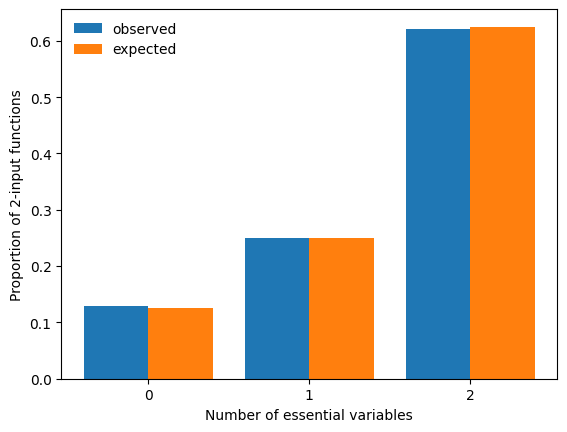

In [111]:
n = 2
nsim = 10000
count_essential_variables = np.zeros(n+1,dtype=int)
for _ in range(nsim):
    f = boolforge.random_function(n,ALLOW_DEGENERATE_FUNCTIONS=True)
    count_essential_variables[f.get_number_of_essential_variables()] += 1

#2 constant "2-input" functions, 4 1-variable "2-input" functions, 10 non-degenerate 2-input functions
expected_proportions = [2/16,4/16,10/16] 

x = np.arange(n+1)
width = 0.4

fig,ax = plt.subplots()
ax.bar(np.arange(n+1)-width/2,count_essential_variables/nsim,width=width,label='observed')
ax.bar(np.arange(n+1)+width/2,expected_proportions,width=width,label='expected')
ax.legend(frameon=False,loc='best')
ax.set_xticks(x)
ax.set_xlabel('Number of essential variables')
ax.set_ylabel(f'Proportion of {n}-input functions')

print('Error:',count_essential_variables/nsim - expected_proportions)


## Functions with specific Hamming weight

The Hamming weight of a Boolean function is the number of 1s in its truth table. BoolForge allows for the generation of random n-input functions with a specific Hamming weight $w\in\{0,1,\ldots,2^n\}$. The additional optional parameters `ALLOW_DEGENERATE_FUNCTIONS` and `EXACT_DEPTH` specify whether degenerate and canalizing functions are allowed. By default, canalizing functions are allowed, while degenerate functions are not. Since all functions with Hamming weight $w\in\{0,1,2^n-1,2^n\}$ are canalizing, we require $2\leq w\leq 2^n-2$ whenever canalizing functions are not permissible (i.e., whenever`EXACT_DEPTH=True`).

In [137]:
n=3

#a random 3-input function with Hamming weight 5
f = boolforge.random_function(n,hamming_weight=5)

#a random non-canalizing 3-input function with Hamming weight 5
g = boolforge.random_function(n,hamming_weight=5,EXACT_DEPTH=True)

#a random, possibly degenerate function with Hamming weight 2
h = boolforge.random_function(n,hamming_weight=2,ALLOW_DEGENERATE_FUNCTIONS=True)


labels = ['f','g','h']

boolforge.display_truth_table(f,g,h,labels=labels)

for func,label in zip([f,g,h],labels):
    canalizing_info = func.get_layer_structure()
    print(f'Hamming weight of {label}: {func.get_hamming_weight()}')     
    print(f'Canalizing depth of {label}: {func.get_canalizing_depth()}')     
    print(f'Number of essential variables of {label}: {func.get_number_of_essential_variables()}')     
    print()

x0	x1	x2	|	f	g	h
-------------------------------------------------
0	0	0	|	1	1	0
0	0	1	|	0	0	0
0	1	0	|	0	1	0
0	1	1	|	1	0	1
1	0	0	|	1	1	1
1	0	1	|	1	1	0
1	1	0	|	0	0	0
1	1	1	|	1	1	0
Hamming weight of f: 5
Canalizing depth of f: 0
Number of essential variables of f: 3

Hamming weight of g: 5
Canalizing depth of g: 0
Number of essential variables of g: 3

Hamming weight of h: 2
Canalizing depth of h: 0
Number of essential variables of h: 3



## Biased functions

While specifying the Hamming weight fixes the exact number of 1s in the truth table of a generated function, specifying the bias or absolute bias acts slightly differently. The bias $p$ describes the probability of selecting a 1 at any position in the truth table and can be modified using the optional argument `bias`. Instead of specifying the bias, the absolute bias may also be specified. Unbiased functions generated using $p=0.5$ have an absolute bias of $0$, the default. If, for example, we set `absolute_bias=0.5` and specify to use absolute bias (`USE_ABSOLUTE_BIAS=True`, default is False), the bias used to generate the function is either 0.25 or 0.75, both with probability 50%. Generally, if we set `USE_ABSOLUTE_BIAS=True; absolute_bias=a` for $a\in [0,1]$, the bias is either $(1+a)/2$ or $(1-a)/2$, both with probability 50%. 

To display these different modes, we repeatedly generate random Boolean functions under three different constraints (`f` with bias $p=0.75$, `g` with absolute bias 0.5, and `h` an unbiased function, i.e., with bias $p=0.5$), and compare the empirical Hamming weight distribution of the three families of functions.

Text(0, 0.5, 'Proportion of 4-input functions')

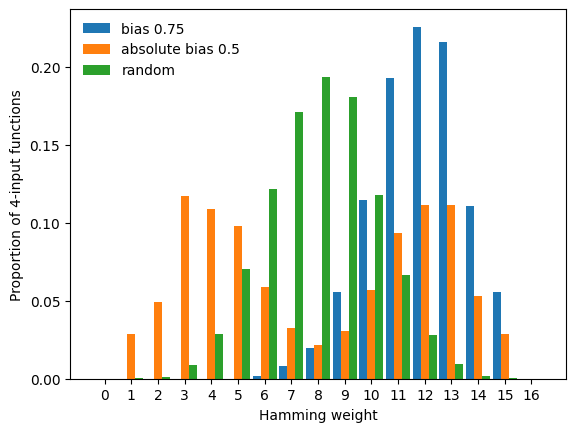

In [ ]:
n=4

nsim = 10000
count_hamming_weights = np.zeros((3,2**n+1),dtype=int)
for _ in range(nsim):
    #a random 3-input function with bias p=0.75
    f = boolforge.random_function(n,bias=0.75)

    #a random 3-input function with absolute bias 0.5 (i.e., bias p=0.25 or p=0.75)
    g = boolforge.random_function(n,absolute_bias=0.5,USE_ABSOLUTE_BIAS=True)

    #a random 3-input function with absolute bias 0.5 (but the absolute_bias is erroneously not used because USE_ABSOLUTE_BIAS=True is missing)
    h = boolforge.random_function(n,absolute_bias=0.5)

    count_hamming_weights[0,f.get_hamming_weight()] += 1
    count_hamming_weights[1,g.get_hamming_weight()] += 1
    count_hamming_weights[2,h.get_hamming_weight()] += 1

labels=['bias 0.75','absolute bias 0.5','random']

x = np.arange(2**n+1)
width = 0.3

fig,ax = plt.subplots()
for i,label in enumerate(labels):
    ax.bar(x-width+width*i,count_hamming_weights[i]/nsim,width=width,label=labels[i])
ax.legend(frameon=False,loc='best')
ax.set_xticks(x)
ax.set_xlabel('Hamming weight')
ax.set_ylabel(f'Proportion of {n}-input functions')



This plot exemplifies the difference between bias and absolute bias: Specifying the bias shifts the mode of the Hamming weight distribution to the value of `bias`. Specifying the absolute bias yields random functions with a bimodal Hamming weight distribution. Note that `absolute_bias=0.5` is ignored in the generation of `h`. The desired use of absolute bias must be specified by `USE_ABSOLUTE_BIAS=True`.

In the above plot, we notice a lack of functions with Hamming weight 0 and $16=2^n$. These constant functions are degenerate and thus not generated unless we set `ALLOW_DEGENERATE_FUNCTIONS=True`, which as we see below slightly modifies the resulting Hamming weight distributions.

Text(0, 0.5, 'Proportion of 4-input functions')

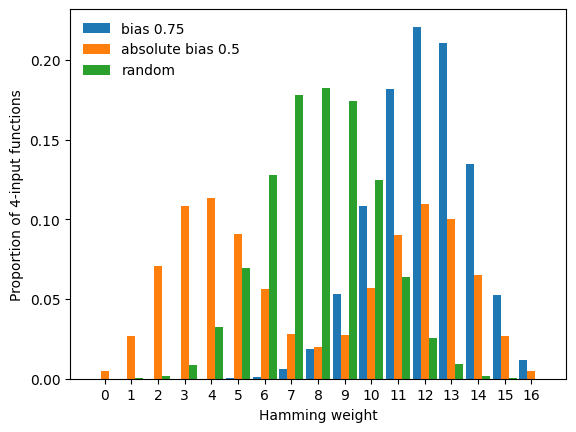

In [157]:
nsim = 10000
count_hamming_weights = np.zeros((3,2**n+1),dtype=int)
for _ in range(nsim):
    #a random 3-input function with bias p=0.75
    f = boolforge.random_function(n,bias=0.75,ALLOW_DEGENERATE_FUNCTIONS=True)

    #a random 3-input function with absolute bias 0.5 (i.e., bias p=0.25 or p=0.75)
    g = boolforge.random_function(n,absolute_bias=0.5,USE_ABSOLUTE_BIAS=True,ALLOW_DEGENERATE_FUNCTIONS=True)

    #a random 3-input function with absolute bias 0.5 (but the absolute_bias is erroneously not used  because USE_ABSOLUTE_BIAS=True is missing)
    h = boolforge.random_function(n,absolute_bias=0.5,ALLOW_DEGENERATE_FUNCTIONS=True)

    count_hamming_weights[0,f.get_hamming_weight()] += 1
    count_hamming_weights[1,g.get_hamming_weight()] += 1
    count_hamming_weights[2,h.get_hamming_weight()] += 1

labels=['bias 0.75','absolute bias 0.5','random']

x = np.arange(2**n+1)
width = 0.3

fig,ax = plt.subplots()
for i,label in enumerate(labels):
    ax.bar(x-width+width*i,count_hamming_weights[i]/nsim,width=width,label=labels[i])
ax.legend(frameon=False,loc='best')
ax.set_xticks(x)
ax.set_xlabel('Hamming weight')
ax.set_ylabel(f'Proportion of {n}-input functions')